✅ Loaded filtered data: 2392 rows

🔍 Processing 'StudyCategory' → ['HighStudy', 'LowStudy']
✅ Saved 1154 rows → StudyCategory_HighStudy.csv
✅ Saved 1238 rows → StudyCategory_LowStudy.csv

🔍 Processing 'AttendanceCategory' → ['HighAttendance', 'LowAttendance']
✅ Saved 1120 rows → AttendanceCategory_HighAttendance.csv
✅ Saved 1272 rows → AttendanceCategory_LowAttendance.csv

🔍 Processing 'Tutoring' → [0, 1]
✅ Saved 1671 rows → Tutoring_0.csv
✅ Saved 721 rows → Tutoring_1.csv

🔍 Processing 'ParentalSupport' → [0, 1, 2, 3, 4]
✅ Saved 212 rows → ParentalSupport_0.csv
✅ Saved 489 rows → ParentalSupport_1.csv
✅ Saved 740 rows → ParentalSupport_2.csv
✅ Saved 697 rows → ParentalSupport_3.csv
✅ Saved 254 rows → ParentalSupport_4.csv

🔍 Processing 'Extracurricular' → [0, 1]
✅ Saved 1475 rows → Extracurricular_0.csv
✅ Saved 917 rows → Extracurricular_1.csv

🔍 Processing 'Sports' → [0, 1]
✅ Saved 1666 rows → Sports_0.csv
✅ Saved 726 rows → Sports_1.csv

🔍 Processing 'Music' → [0, 1]
✅ Saved 1921 ro

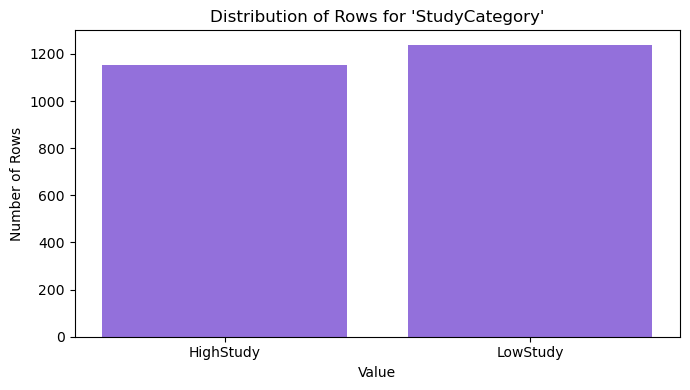

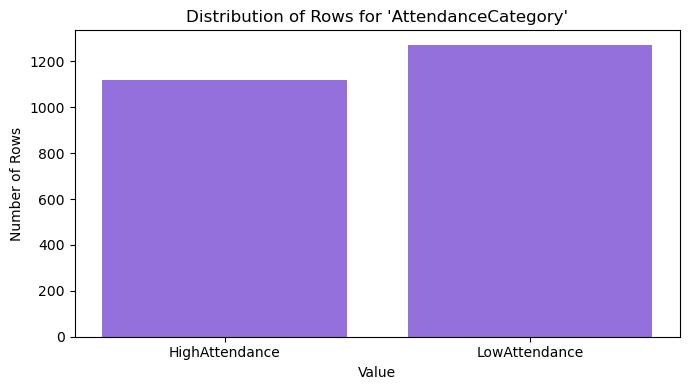

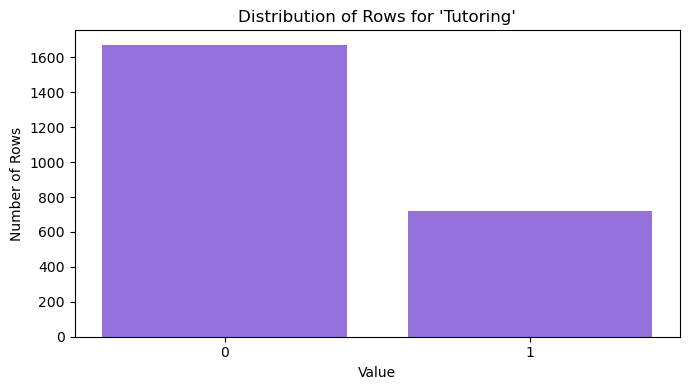

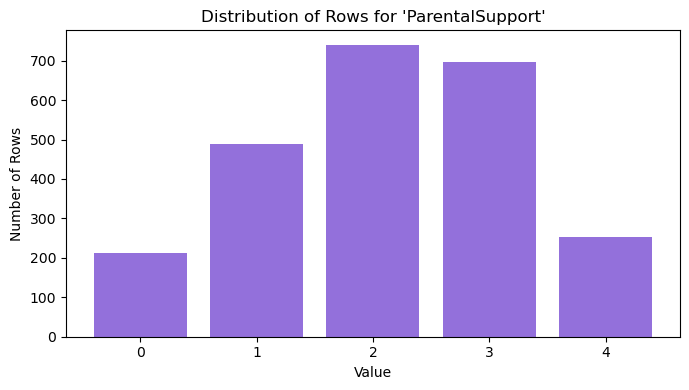

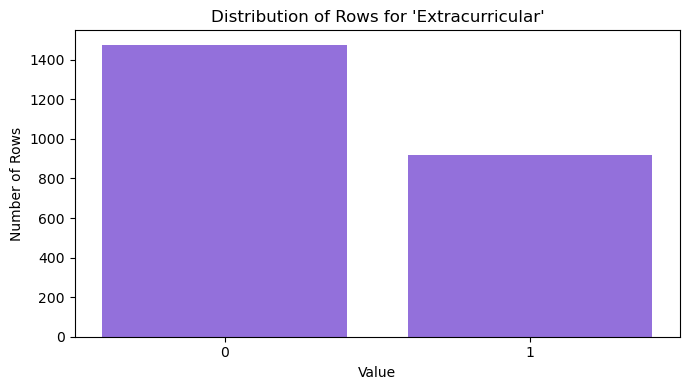

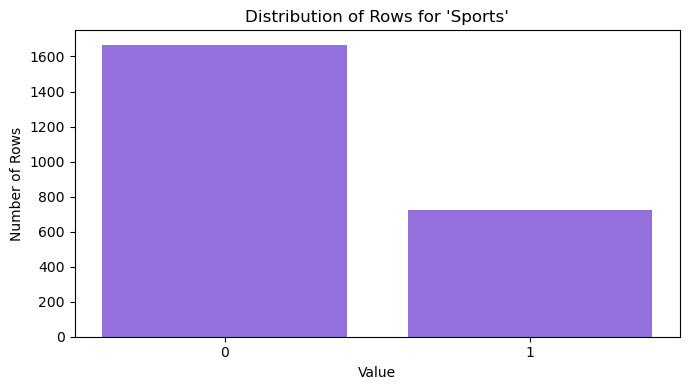

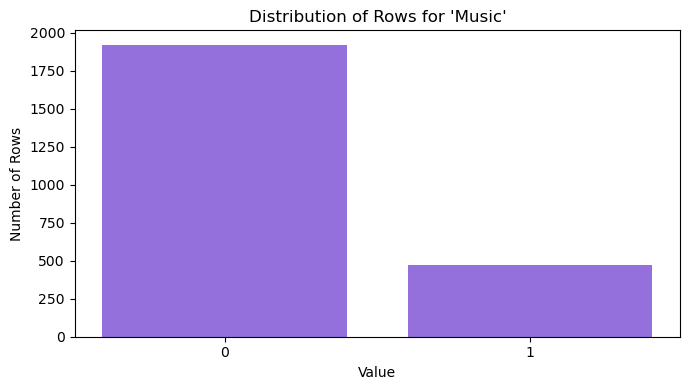

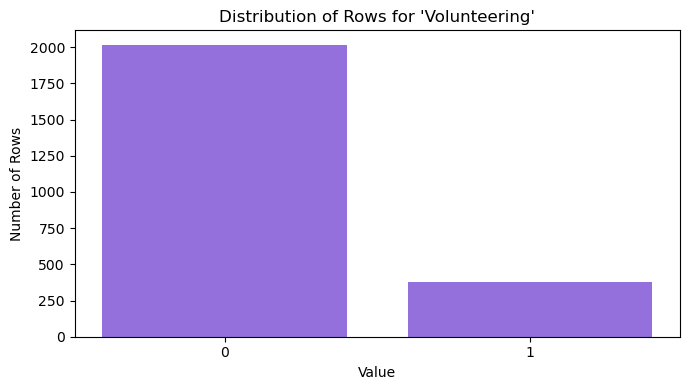

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered data ===
filtered_file = "data/filtering.csv"
try:
    data = pd.read_csv(filtered_file)
except FileNotFoundError:
    raise FileNotFoundError(f"❌ File '{filtered_file}' not found.")

print(f"✅ Loaded filtered data: {len(data)} rows")

# === Create custom categories for StudyTimeWeekly and Absences ===
def categorize_study_time(hours):
    if hours <= 10:
        return "LowStudy"
    elif hours <= 20:
        return "HighStudy"
    return "Other"  # fallback (in case of outliers)

def categorize_attendance(absences):
    if absences <= 15:
        return "LowAttendance"
    elif absences <= 30:
        return "HighAttendance"
    return "Other"

data["StudyCategory"] = data["StudyTimeWeekly"].apply(categorize_study_time)
data["AttendanceCategory"] = data["Absences"].apply(categorize_attendance)

# === Features to filter (including new categories) ===
target_features = [
    "StudyCategory",         # custom
    "AttendanceCategory",    # custom
    "Tutoring",
    "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering"
]

# === Create folder
output_folder = "data/filtered_by_value"
os.makedirs(output_folder, exist_ok=True)

# === Summary tracking
summary_records = []

# === Filter and save per value
for feature in target_features:
    if feature not in data.columns:
        print(f"⚠️ Skipping '{feature}' (not found)")
        continue

    unique_vals = sorted(data[feature].dropna().unique())
    print(f"\n🔍 Processing '{feature}' → {unique_vals}")

    for val in unique_vals:
        subset = data[data[feature] == val].copy()
        if subset.empty:
            continue

        filename = f"{feature}_{val}.csv".replace(" ", "_")
        filepath = os.path.join(output_folder, filename)
        subset.to_csv(filepath, index=False)

        summary_records.append({
            "Feature": feature,
            "Value": val,
            "Rows": len(subset),
            "Filename": filename
        })

        print(f"✅ Saved {len(subset)} rows → {filename}")

# === Create summary table
summary_df = pd.DataFrame(summary_records)
summary_df.to_csv("data/filter_summary.csv", index=False)
print("\n📋 Summary saved to 'data/filter_summary.csv'")

# === Show sample of summary
print("\n📊 Filter Summary:")
print(summary_df.head(12))

# === Plot charts
for feature in summary_df["Feature"].unique():
    feature_df = summary_df[summary_df["Feature"] == feature]
    plt.figure(figsize=(7, 4))
    plt.bar(feature_df["Value"].astype(str), feature_df["Rows"], color="mediumpurple")
    plt.title(f"Distribution of Rows for '{feature}'")
    plt.xlabel("Value")
    plt.ylabel("Number of Rows")
    plt.tight_layout()
    plt.show()
